<a href="https://colab.research.google.com/github/bhargabdhungel/woc_machine_learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# importing_data from drive
raw_training_data = pd.read_csv('/content/drive/MyDrive/woc/logistic_reg_data/emnist-letters-train.csv')
raw_testing_data = pd.read_csv('/content/drive/MyDrive/woc/logistic_reg_data/emnist-letters-test.csv')
training_data=raw_training_data.to_numpy()
testing_data=raw_testing_data.to_numpy()

In [32]:
m=30000
alpha=2
iter=400

In [33]:
# training data
x=training_data[:m,1:]
mean=np.mean(x, axis=0)
maxs=np.amax(x,axis=0)
mins=np.amin(x,axis=0)
ranges=maxs-mins
x=(x-mean)/(ranges+1)
ones=np.ones((m,1))
x_train=np.hstack((ones,x))
y=training_data[:m,0]

Value in dataset: 21.0
Actual Alphabet: U


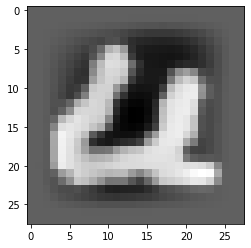

In [34]:
# data visualization
t=1234
alphabets=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
print('Value in dataset:',y[t])
print('Actual Alphabet:',alphabets[int(y[t])-1])
plt.imshow((x[t,:].reshape((28,28))).T,cmap='gray')

In [35]:
# storing index of every letter
dic={}
for item in range(1,27):
  indexes = [i for i, j in enumerate(y) if j == item]
  dic[item]=indexes

In [36]:
def h(x_train,theta):
  g=x_train@theta
  h=1/(1+(np.exp(-g)))
  return h

In [37]:
def cost_function(x_train,y,theta,m):
  hypo=h(x_train,theta)
  f=np.sum((y*np.log(hypo))+((1-y)*np.log(1-hypo)))
  return -f/m

In [38]:
# gradient descent
theta_all=np.zeros((785,1))
for alp in range(1,27):
  theta=np.zeros((785,1))
  y_train=np.zeros((m,1))
  for i in dic[alp]:
    y_train[i]=1
  for it in range(iter):
    diff=h(x_train,theta)-y_train
    theta=theta-  (alpha/m) * (x_train.transpose() @ diff)
  theta_all=np.hstack((theta_all,theta))
theta_all=theta_all[:,1:]

In [39]:
# testing_data
x=training_data[:20000,1:]
mean=np.mean(x, axis=0)
maxs=np.amax(x,axis=0)
mins=np.amin(x,axis=0)
ranges=maxs-mins
x=(x-mean)/(ranges+1)
ones=np.ones((20000,1))
x_test=np.hstack((ones,x))
y=training_data[:20000,0]

In [40]:
# prediction
prediction=h(x_test,theta_all)
prediction=np.argmax(prediction, axis=1)+1
d=prediction-y
(1-np.count_nonzero(d)/len(d))*100

71.725